# Plot Multiple Shapefiles With Geopandas
This episode explains how to crop a raster using the extent of a vector shapefile. We will also cover how to extract values from a raster that occur withi a set of polygons, or in a buffer region around a set of points.

In [1]:
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# shapefiles
lines_HARV = gpd.read_file("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Site-Layout-Files/HARV/HARV_roads.shp")
point_HARV = gpd.read_file("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Site-Layout-Files/HARV/HARVtower_UTM18N.shp")
aoi_boundary = gpd.read_file("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Site-Layout-Files/HARV/HarClip_UTMZ18.shp")

# CHM
CHM_HARV = rioxarray.open_rasterio("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/HARV/CHM/HARV_chmCrop.tif")

plot_locations_HARV = pd.read_csv("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Site-Layout-Files/HARV/HARV_PlotLocations.csv")
plot_locations_HARV = gpd.GeoDataFrame(plot_locations_HARV, 
                    geometry=gpd.points_from_xy(plot_locations_HARV.easting, plot_locations_HARV.northing), 
                    crs=CHM_HARV.rio.crs)

## Crop a Raster to Vector Extent
We often work with spatial layers that have different spatial extents. The spatial extent of a shapefile represents the geographic edge. Thus it represents teh overall geographic coverage of the object.

We can use the `crop_image` function to remove all data outside your study area. 

In [3]:
print(aoi_boundary.crs)

epsg:32618


In [4]:
print(CHM_HARV.rio.crs)

EPSG:32618


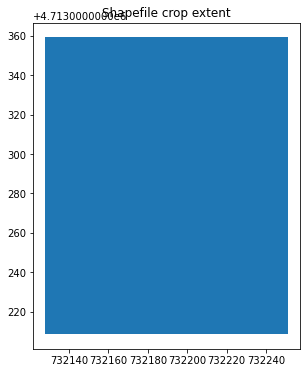

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
aoi_boundary.plot(ax=ax)
plt.title("Shapefile crop extent")
plt.ticklabel_format(style='plain')
plt.show()

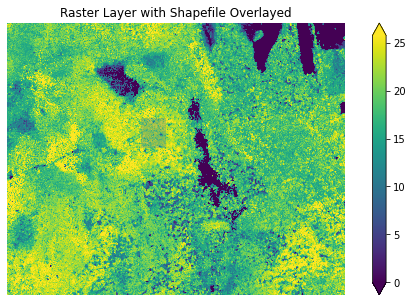

In [41]:
f, ax = plt.subplots(figsize=(10, 5))
CHM_HARV.plot(cmap="viridis", robust=True)

aoi_boundary.plot(ax=ax, alpha=.3)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

## Clip Raster Data Using RioXarray `.clip`
If you want to crop the data you can use the `rio.clip`function. To perform the clip you:
1. Open the raster dataset you want to crop using rioxarray
2. Open your shapefile as a geopandas object
3. Crop the data using the `.clip()` function

`.clip()` has several parameters including:
- `drop=True`: The default setting will drop all pixels out of the clip extent
- `invert=False`: The default will clip all data INSIDE of the clip extent
- `crs`: if your shapefile is in a different CRS than the raster data, pass the CRS to ensure the data are clipped properly.

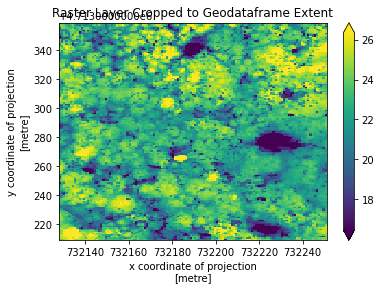

In [42]:
from shapely.geometry import mapping

chm_clipped = CHM_HARV.rio.clip(aoi_boundary.geometry.apply(mapping), aoi_boundary.crs)
# the second parameter is only needed if in different crs

chm_clipped.plot(cmap="viridis", robust=True)
plt.ticklabel_format(style="plain")
plt.title("Raster Layer Cropped to Geodataframe Extent")
plt.show()